In [31]:
from nnunetv2.evaluation.evaluate_predictions import compute_metrics_on_folder
from nnunetv2.imageio.nibabel_reader_writer import NibabelIO

def compute_summary(input_folder: str, output_folder: str):
    """
    Compute Dice and IoU metrics for the predictions in output_folder
    compared to the ground truth in input_folder. Save a summary of the
    metrics in summary.json within the output_folder.
    """
    # The regions or labels to compute the metrics for. Replace this with
    # the appropriate value for your data.
    # regions_or_labels = [0, 1, 2, 3, 4]
    regions_or_labels = [1]

    # The class to read and write the image files. Replace this with the
    # appropriate class if you're not using NIfTI images.
    image_reader_writer = NibabelIO()

    # The file ending for the segmentation files. This is '.nii.gz' for NIfTI images.
    file_ending = '.nii.gz'

    # Call the function to compute the metrics
    metrics = compute_metrics_on_folder(
        folder_ref=input_folder,
        folder_pred=output_folder,
        output_file=f"{output_folder}/summary.json",
        image_reader_writer=image_reader_writer,
        file_ending=file_ending,
        regions_or_labels=regions_or_labels
    )

    return metrics

In [2]:
compute_summary("dataset/3T-Ingenia/labelsTr", "pre_result/004m_005d")

{'metric_per_case': [{'reference_file': 'dataset/3T-Ingenia/labelsTr/data_001.nii.gz',
   'prediction_file': 'pre_result/004m_005d/data_001.nii.gz',
   'metrics': {1: {'Dice': 0.7304554220442071,
     'IoU': 0.5753680766534237,
     'FP': 3689,
     'TP': 9848,
     'FN': 3579,
     'TN': 5225764,
     'n_pred': 13537,
     'n_ref': 13427}}},
  {'reference_file': 'dataset/3T-Ingenia/labelsTr/data_002.nii.gz',
   'prediction_file': 'pre_result/004m_005d/data_002.nii.gz',
   'metrics': {1: {'Dice': 0.6691297815217123,
     'IoU': 0.5027761326621262,
     'FP': 10241,
     'TP': 13583,
     'FN': 3192,
     'TN': 5215864,
     'n_pred': 23824,
     'n_ref': 16775}}},
  {'reference_file': 'dataset/3T-Ingenia/labelsTr/data_003.nii.gz',
   'prediction_file': 'pre_result/004m_005d/data_003.nii.gz',
   'metrics': {1: {'Dice': 0.8333739748706958,
     'IoU': 0.7143454345434543,
     'FP': 3105,
     'TP': 32467,
     'FN': 9878,
     'TN': 5197430,
     'n_pred': 35572,
     'n_ref': 42345}}},


In [3]:
compute_summary("dataset/3T-Achieva/labelsTr", "pre_result/005m_004d")

{'metric_per_case': [{'reference_file': 'dataset/3T-Achieva/labelsTr/data_001.nii.gz',
   'prediction_file': 'pre_result/005m_004d/data_001.nii.gz',
   'metrics': {1: {'Dice': 0.5569220651101612,
     'IoU': 0.3859265335885516,
     'FP': 880,
     'TP': 4234,
     'FN': 5857,
     'TN': 5231909,
     'n_pred': 5114,
     'n_ref': 10091}}},
  {'reference_file': 'dataset/3T-Achieva/labelsTr/data_002.nii.gz',
   'prediction_file': 'pre_result/005m_004d/data_002.nii.gz',
   'metrics': {1: {'Dice': 0.8679147614528514,
     'IoU': 0.7666514250876391,
     'FP': 917,
     'TP': 5030,
     'FN': 614,
     'TN': 5236319,
     'n_pred': 5947,
     'n_ref': 5644}}},
  {'reference_file': 'dataset/3T-Achieva/labelsTr/data_003.nii.gz',
   'prediction_file': 'pre_result/005m_004d/data_003.nii.gz',
   'metrics': {1: {'Dice': 0.6394675925925926,
     'IoU': 0.4700127605274351,
     'FP': 1813,
     'TP': 12155,
     'FN': 11893,
     'TN': 5217019,
     'n_pred': 13968,
     'n_ref': 24048}}},
  {'ref

In [26]:
from nnunetv2.evaluation.evaluate_predictions import compute_metrics_on_folder
from nnunetv2.imageio.nibabel_reader_writer import NibabelIO
import numpy as np
import os

def compute_mask_volume(input_folder: str, output_folder: str):
    """
    Compute Dice and IoU metrics for the predictions in output_folder
    compared to the ground truth in input_folder. Save a summary of the
    metrics in summary.json within the output_folder. Also return the
    number of pixels in the predicted and ground truth masks.
    """
    # The regions or labels to compute the metrics for. Replace this with
    # the appropriate value for your data.
    # regions_or_labels = [0, 1, 2, 3, 4]
    regions_or_labels = [1]

    # The class to read and write the image files. Replace this with the
    # appropriate class if you're not using NIfTI images.
    image_reader_writer = NibabelIO()

    # The file ending for the segmentation files. This is '.nii.gz' for NIfTI images.
    file_ending = '.nii.gz'

    # Compute the total number of pixels in the predicted and ground truth masks
    pixels = []
    for case in os.listdir(input_folder):
        pred = 0
        gt = 0
        if case.endswith(file_ending):
            pred_mask = image_reader_writer.read_seg(f"{output_folder}/{case}")
            gt_mask = image_reader_writer.read_seg(f"{input_folder}/{case}")
            pred += np.sum(pred_mask[0] > 0)
            gt += np.sum(gt_mask[0] > 0)
            pixels.append((gt,pred))

    return pixels

In [13]:
# test method
a = compute_mask_volume("dataset/3T-Achieva/labelsTr", "pre_result/005m_004d")
print(a)

[(23659, 16839), (10848, 5017), (2774, 5345), (22448, 17882), (16119, 12885), (34499, 32540), (21271, 18660), (2133, 667), (23233, 23150), (14909, 24456), (29436, 18754), (27408, 21050), (16574, 21034), (8130, 5858), (17938, 7672), (60921, 58389), (24229, 20933), (40206, 34079), (48154, 39288), (18206, 14892), (552, 1602), (25968, 12482), (24382, 22165), (661, 207), (13185, 3332), (21743, 20868), (5644, 5947), (44060, 43714), (26157, 19524), (24111, 16643), (12704, 12227), (31269, 11766), (2701, 2883), (85427, 63319), (13842, 16041), (40046, 25174), (57873, 48827), (24961, 21649), (9305, 7614), (6975, 10152), (42736, 35460), (43644, 25373), (3164, 1468), (11391, 13671), (52319, 52490), (50181, 26757), (12259, 10843), (16685, 9388), (8049, 9756), (21212, 22580), (24924, 12116), (37444, 20496), (7889, 5324), (6621, 4175), (12104, 20619), (27816, 28386), (13585, 10135), (10091, 5114), (29665, 19268), (13324, 8224), (11544, 10859), (17655, 15654), (32006, 22003), (15265, 15461), (22397, 18

In [14]:
ge_pixels = compute_mask_volume("dataset/1.5T-GE/labelsTr", "pre_result/1.5ge")
print(ge_pixels)

[(13854, 15759), (21033, 20733), (11624, 9019), (4387, 8518), (26350, 25579), (42540, 28886), (13565, 10347), (28322, 27762), (65484, 61887), (19649, 16951), (21262, 22090), (30780, 25012), (15687, 15963), (24059, 17293), (3625, 13116), (15146, 23396), (22717, 17637), (4429, 3886), (26743, 21013), (53817, 45364), (39701, 35172), (7375, 7811), (20358, 24771), (5271, 4839), (26761, 24120), (23356, 26008), (11882, 12939), (23479, 32776), (4672, 7511), (18917, 19488), (12096, 9975), (9631, 11319), (6317, 6830), (26302, 29481), (7196, 20483), (14522, 12350), (24836, 19886), (11122, 11009), (25442, 24756), (19595, 15445), (9821, 15824), (16909, 19030), (9281, 8823), (26199, 24734), (34027, 27566), (7301, 6253), (16706, 25762), (14721, 20615), (10075, 10771), (641, 254), (15772, 15616), (27781, 26068), (24496, 25681), (1998, 2106), (32610, 20962), (13118, 23720), (65388, 50358), (8323, 9709), (48559, 45747), (2704, 1608), (8680, 7437), (22480, 23419), (14081, 11147), (14341, 9600), (20857, 20

In [15]:
phillips_pixels = compute_mask_volume("dataset/1.5T-Phillips/labelsTr", "pre_result/1.5phillips")
print(phillips_pixels)

[(28315, 34566), (4292, 5025), (5433, 11455), (5086, 6537), (28486, 16968), (15858, 15478), (19358, 18065), (7112, 8533), (3796, 4162), (13263, 16133), (14133, 14138), (3168, 2703), (13301, 18058), (4895, 2727), (12573, 8542), (18517, 19500), (7289, 9558), (22735, 17880), (14581, 17184), (10184, 12121), (19189, 21030), (11092, 8187), (26520, 27032), (15261, 14443), (1600, 4519), (1070, 1150), (6994, 7933), (7464, 7246), (20450, 15198), (12391, 17451), (10877, 12584), (10967, 15267), (11411, 12037), (11228, 12462), (32214, 27023), (40036, 34624), (18277, 15874), (405, 608), (4998, 3808), (22036, 25592), (7314, 6728), (26324, 19776), (4971, 7079), (13272, 10817), (17980, 20600), (7132, 7973), (10705, 11718), (9843, 11790), (9171, 11474), (9362, 16708), (3602, 4939), (957, 3519), (6645, 4101), (16117, 13043), (9519, 10318), (3505, 3255), (12559, 17185), (37329, 34571), (9750, 12261), (8747, 9636), (5364, 5618), (6799, 8421), (10134, 10195), (8208, 7845), (16579, 14050), (6329, 5571), (216

In [16]:
achieva_pixels = compute_mask_volume("dataset/3T-Achieva/labelsTr", "pre_result/3Achieva")
print(achieva_pixels)

[(23659, 13919), (10848, 12637), (2774, 3227), (22448, 21807), (16119, 17954), (34499, 31269), (21271, 20622), (2133, 1875), (23233, 26023), (14909, 18227), (29436, 23696), (27408, 21137), (16574, 18974), (8130, 8501), (17938, 14345), (60921, 57958), (24229, 16012), (40206, 42244), (48154, 39762), (18206, 16967), (552, 2244), (25968, 22740), (24382, 24482), (661, 497), (13185, 7247), (21743, 20224), (5644, 7667), (44060, 45317), (26157, 21721), (24111, 24378), (12704, 13858), (31269, 14103), (2701, 4487), (85427, 69279), (13842, 16527), (40046, 32786), (57873, 49409), (24961, 25461), (9305, 13882), (6975, 8914), (42736, 39686), (43644, 29629), (3164, 5001), (11391, 15345), (52319, 50345), (50181, 22719), (12259, 14165), (16685, 12169), (8049, 13964), (21212, 24478), (24924, 17463), (37444, 11120), (7889, 8035), (6621, 5194), (12104, 24688), (27816, 29097), (13585, 13501), (10091, 5432), (29665, 24375), (13324, 14589), (11544, 14431), (17655, 19346), (32006, 26924), (15265, 19714), (223

In [17]:
ingenia_pixels = compute_mask_volume("dataset/3T-Ingenia/labelsTr", "pre_result/3Ingenia")
print(ingenia_pixels)

[(34079, 38801), (8404, 8425), (41354, 36246), (14905, 19498), (53331, 51799), (7830, 7652), (73861, 68472), (3033, 3093), (20147, 21856), (4219, 2578), (6310, 6655), (62358, 53327), (15959, 10979), (57594, 54630), (10152, 11651), (22761, 13291), (35977, 33154), (14752, 15999), (37849, 35168), (22042, 20619), (24463, 13348), (3709, 4506), (34541, 32786), (26840, 27680), (45119, 57036), (45466, 39810), (21878, 25910), (734, 3348), (7783, 9122), (22333, 17620), (11017, 10480), (16775, 15949), (16020, 14431), (31671, 25027), (27227, 24723), (24362, 19973), (15874, 15714), (5087, 6836), (8343, 4209), (35844, 33211), (22847, 32284), (11265, 13333), (39863, 35074), (5460, 5171), (47239, 37921), (44650, 52873), (3409, 6664), (15877, 18218), (14720, 12501), (22550, 22572), (16849, 17885), (22184, 24935), (5394, 4357), (12748, 13648), (37689, 37603), (67081, 62018), (9551, 10801), (10321, 17932), (9020, 10191), (7690, 9100), (16876, 15142), (15431, 13413), (20609, 19298), (45695, 43455), (7337,

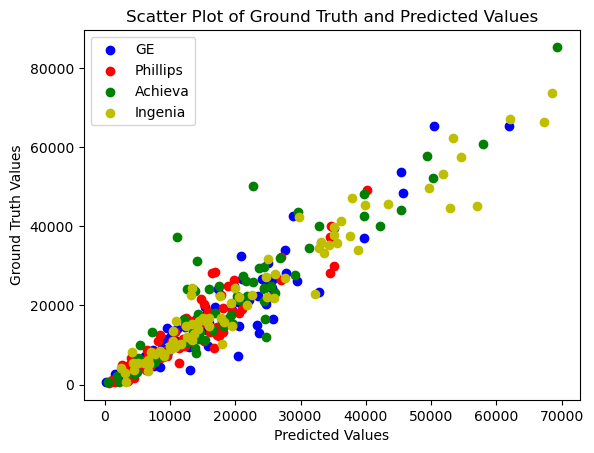

In [18]:
import matplotlib.pyplot as plt

# 提取数据的真实值和预测值
ge_gt = [i[0] for i in ge_pixels]
ge_pred = [i[1] for i in ge_pixels]

phillips_gt = [i[0] for i in phillips_pixels]
phillips_pred = [i[1] for i in phillips_pixels]

achieva_gt = [i[0] for i in achieva_pixels]
achieva_pred = [i[1] for i in achieva_pixels]

ingenia_gt = [i[0] for i in ingenia_pixels]
ingenia_pred = [i[1] for i in ingenia_pixels]

# 创建散点图
plt.scatter(ge_pred, ge_gt, c='b', label='GE')
plt.scatter(phillips_pred, phillips_gt, c='r', label='Phillips')
plt.scatter(achieva_pred, achieva_gt, c='g', label='Achieva')
plt.scatter(ingenia_pred, ingenia_gt, c='y', label='Ingenia')

# 设置图形标题和坐标轴标签
plt.title('Scatter Plot of Ground Truth and Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Ground Truth Values')

# 显示图例
plt.legend()

# 显示图形
plt.show()


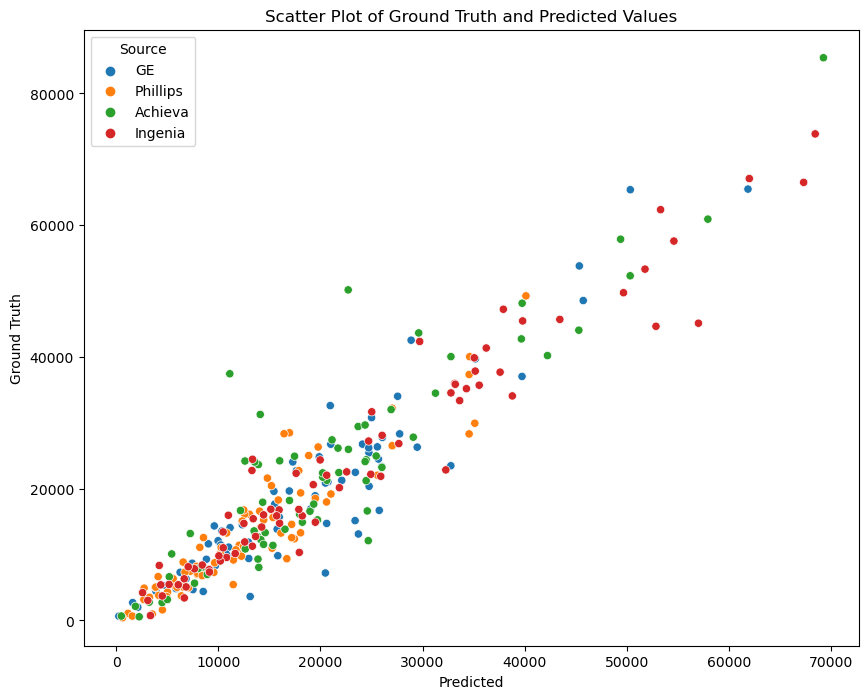

In [19]:
import seaborn as sns
import pandas as pd

# 数据整理为 DataFrame
df_ge = pd.DataFrame(ge_pixels, columns=['Ground Truth', 'Predicted'])
df_ge['Source'] = 'GE'

df_phillips = pd.DataFrame(phillips_pixels, columns=['Ground Truth', 'Predicted'])
df_phillips['Source'] = 'Phillips'

df_achieva = pd.DataFrame(achieva_pixels, columns=['Ground Truth', 'Predicted'])
df_achieva['Source'] = 'Achieva'

df_ingenia = pd.DataFrame(ingenia_pixels, columns=['Ground Truth', 'Predicted'])
df_ingenia['Source'] = 'Ingenia'

df = pd.concat([df_ge, df_phillips, df_achieva, df_ingenia])

# 使用Seaborn绘制
plt.figure(figsize=(10,8))
sns.scatterplot(x='Predicted', y='Ground Truth', hue='Source', data=df)

plt.title('Scatter Plot of Ground Truth and Predicted Values')
plt.show()

In [7]:
compute_summary("dataset/1.5T-GE/labelsTr", "pre_result/005m_002d")

{'metric_per_case': [{'reference_file': 'dataset/1.5T-GE/labelsTr/data_001.nii.gz',
   'prediction_file': 'pre_result/005m_002d/data_001.nii.gz',
   'metrics': {1: {'Dice': 0.1126425855513308,
     'IoU': 0.059682699571896244,
     'FP': 37006,
     'TP': 2370,
     'FN': 334,
     'TN': 8348898,
     'n_pred': 39376,
     'n_ref': 2704}}},
  {'reference_file': 'dataset/1.5T-GE/labelsTr/data_002.nii.gz',
   'prediction_file': 'pre_result/005m_002d/data_002.nii.gz',
   'metrics': {1: {'Dice': 0.26995637477248435,
     'IoU': 0.15604021241775493,
     'FP': 25269,
     'TP': 4672,
     'FN': 0,
     'TN': 8358667,
     'n_pred': 29941,
     'n_ref': 4672}}},
  {'reference_file': 'dataset/1.5T-GE/labelsTr/data_003.nii.gz',
   'prediction_file': 'pre_result/005m_002d/data_003.nii.gz',
   'metrics': {1: {'Dice': 0.24218348099456988,
     'IoU': 0.13777517640555392,
     'FP': 25928,
     'TP': 4237,
     'FN': 588,
     'TN': 8357855,
     'n_pred': 30165,
     'n_ref': 4825}}},
  {'referen

In [8]:
compute_summary("dataset/1.5T-Phillips/labelsTr", "pre_result/005m_003d")

{'metric_per_case': [{'reference_file': 'dataset/1.5T-Phillips/labelsTr/data_001.nii.gz',
   'prediction_file': 'pre_result/005m_003d/data_001.nii.gz',
   'metrics': {1: {'Dice': 0.7051779958507117,
     'IoU': 0.5446138493097522,
     'FP': 40917,
     'TP': 49116,
     'FN': 152,
     'TN': 6201271,
     'n_pred': 90033,
     'n_ref': 49268}}},
  {'reference_file': 'dataset/1.5T-Phillips/labelsTr/data_002.nii.gz',
   'prediction_file': 'pre_result/005m_003d/data_002.nii.gz',
   'metrics': {1: {'Dice': 0.3539138082673703,
     'IoU': 0.21500320581320795,
     'FP': 40058,
     'TP': 11066,
     'FN': 345,
     'TN': 6239987,
     'n_pred': 51124,
     'n_ref': 11411}}},
  {'reference_file': 'dataset/1.5T-Phillips/labelsTr/data_003.nii.gz',
   'prediction_file': 'pre_result/005m_003d/data_003.nii.gz',
   'metrics': {1: {'Dice': 0.049393302748359985,
     'IoU': 0.025322020486217962,
     'FP': 22091,
     'TP': 576,
     'FN': 80,
     'TN': 7841573,
     'n_pred': 22667,
     'n_ref':

In [3]:
compute_summary("dataset/1.5T-GE/labelsTr", "pre_result/006_pre_002")

{'metric_per_case': [{'reference_file': 'dataset/1.5T-GE/labelsTr/data_001.nii.gz',
   'prediction_file': 'pre_result/006_pre_002/data_001.nii.gz',
   'metrics': {1: {'Dice': 0.9603188983511506,
     'IoU': 0.9236667828511677,
     'FP': 165,
     'TP': 2650,
     'FN': 54,
     'TN': 8385739,
     'n_pred': 2815,
     'n_ref': 2704}}},
  {'reference_file': 'dataset/1.5T-GE/labelsTr/data_002.nii.gz',
   'prediction_file': 'pre_result/006_pre_002/data_002.nii.gz',
   'metrics': {1: {'Dice': 0.963001133669999,
     'IoU': 0.92864241701451,
     'FP': 359,
     'TP': 4672,
     'FN': 0,
     'TN': 8383577,
     'n_pred': 5031,
     'n_ref': 4672}}},
  {'reference_file': 'dataset/1.5T-GE/labelsTr/data_003.nii.gz',
   'prediction_file': 'pre_result/006_pre_002/data_003.nii.gz',
   'metrics': {1: {'Dice': 0.9723882134762003,
     'IoU': 0.9462602767194707,
     'FP': 162,
     'TP': 4719,
     'FN': 106,
     'TN': 8383621,
     'n_pred': 4881,
     'n_ref': 4825}}},
  {'reference_file': 'da

In [4]:
compute_summary("dataset/1.5T-Phillips/labelsTr", "pre_result/006_pre_003")

{'metric_per_case': [{'reference_file': 'dataset/1.5T-Phillips/labelsTr/data_001.nii.gz',
   'prediction_file': 'pre_result/006_pre_003/data_001.nii.gz',
   'metrics': {1: {'Dice': 0.9906055876862817,
     'IoU': 0.9813860425635118,
     'FP': 211,
     'TP': 48558,
     'FN': 710,
     'TN': 6241977,
     'n_pred': 48769,
     'n_ref': 49268}}},
  {'reference_file': 'dataset/1.5T-Phillips/labelsTr/data_002.nii.gz',
   'prediction_file': 'pre_result/006_pre_003/data_002.nii.gz',
   'metrics': {1: {'Dice': 0.9778979031344,
     'IoU': 0.9567516847223407,
     'FP': 312,
     'TP': 11216,
     'FN': 195,
     'TN': 6279733,
     'n_pred': 11528,
     'n_ref': 11411}}},
  {'reference_file': 'dataset/1.5T-Phillips/labelsTr/data_003.nii.gz',
   'prediction_file': 'pre_result/006_pre_003/data_003.nii.gz',
   'metrics': {1: {'Dice': 0.9885057471264368,
     'IoU': 0.9772727272727273,
     'FP': 4,
     'TP': 645,
     'FN': 11,
     'TN': 7863660,
     'n_pred': 649,
     'n_ref': 656}}},
  {

In [5]:
compute_summary("dataset/3T-Ingenia/labelsTr", "pre_result/006_pre_005")

{'metric_per_case': [{'reference_file': 'dataset/3T-Ingenia/labelsTr/data_001.nii.gz',
   'prediction_file': 'pre_result/006_pre_005/data_001.nii.gz',
   'metrics': {1: {'Dice': 0.9707996406109614,
     'IoU': 0.9432562199912702,
     'FP': 319,
     'TP': 12966,
     'FN': 461,
     'TN': 5229134,
     'n_pred': 13285,
     'n_ref': 13427}}},
  {'reference_file': 'dataset/3T-Ingenia/labelsTr/data_002.nii.gz',
   'prediction_file': 'pre_result/006_pre_005/data_002.nii.gz',
   'metrics': {1: {'Dice': 0.9548734326945825,
     'IoU': 0.9136438232131742,
     'FP': 896,
     'TP': 16145,
     'FN': 630,
     'TN': 5225209,
     'n_pred': 17041,
     'n_ref': 16775}}},
  {'reference_file': 'dataset/3T-Ingenia/labelsTr/data_003.nii.gz',
   'prediction_file': 'pre_result/006_pre_005/data_003.nii.gz',
   'metrics': {1: {'Dice': 0.9662650602409638,
     'IoU': 0.9347319347319347,
     'FP': 984,
     'TP': 40501,
     'FN': 1844,
     'TN': 5199551,
     'n_pred': 41485,
     'n_ref': 42345}}},

In [2]:
compute_summary("dataset/3T-Achieva/labelsTr", "pre_result/006_pre_004")

{'metric_per_case': [{'reference_file': 'dataset/3T-Achieva/labelsTr/data_001.nii.gz',
   'prediction_file': 'pre_result/006_pre_004/data_001.nii.gz',
   'metrics': {1: {'Dice': 0.9346596858638744,
     'IoU': 0.8773343817574208,
     'FP': 83,
     'TP': 8926,
     'FN': 1165,
     'TN': 5232706,
     'n_pred': 9009,
     'n_ref': 10091}}},
  {'reference_file': 'dataset/3T-Achieva/labelsTr/data_002.nii.gz',
   'prediction_file': 'pre_result/006_pre_004/data_002.nii.gz',
   'metrics': {1: {'Dice': 0.9419057739992915,
     'IoU': 0.8901908269166388,
     'FP': 330,
     'TP': 5318,
     'FN': 326,
     'TN': 5236906,
     'n_pred': 5648,
     'n_ref': 5644}}},
  {'reference_file': 'dataset/3T-Achieva/labelsTr/data_003.nii.gz',
   'prediction_file': 'pre_result/006_pre_004/data_003.nii.gz',
   'metrics': {1: {'Dice': 0.922668851893384,
     'IoU': 0.856439409103647,
     'FP': 931,
     'TP': 21393,
     'FN': 2655,
     'TN': 5217901,
     'n_pred': 22324,
     'n_ref': 24048}}},
  {'re

In [32]:
compute_summary("/Volumes/T7/ZHT/T2-SPIR_labels", "/Volumes/T7/ZHT/Model005_pre_Dataset_T2-SPIR")

{'metric_per_case': [{'reference_file': '/Volumes/T7/ZHT/T2-SPIR_labels/data_001.nii.gz',
   'prediction_file': '/Volumes/T7/ZHT/Model005_pre_Dataset_T2-SPIR/data_001.nii.gz',
   'metrics': {1: {'Dice': 0.13840187239651544,
     'IoU': 0.07434573034013853,
     'FP': 119447,
     'TP': 16380,
     'FN': 84495,
     'TN': 2138974,
     'n_pred': 135827,
     'n_ref': 100875}}},
  {'reference_file': '/Volumes/T7/ZHT/T2-SPIR_labels/data_002.nii.gz',
   'prediction_file': '/Volumes/T7/ZHT/Model005_pre_Dataset_T2-SPIR/data_002.nii.gz',
   'metrics': {1: {'Dice': 0.16900193522255058,
     'IoU': 0.09230044448085865,
     'FP': 116518,
     'TP': 22531,
     'FN': 105056,
     'TN': 2418295,
     'n_pred': 139049,
     'n_ref': 127587}}},
  {'reference_file': '/Volumes/T7/ZHT/T2-SPIR_labels/data_003.nii.gz',
   'prediction_file': '/Volumes/T7/ZHT/Model005_pre_Dataset_T2-SPIR/data_003.nii.gz',
   'metrics': {1: {'Dice': 0.20230370253946156,
     'IoU': 0.1125349720223821,
     'FP': 84488,
   

In [29]:
compute_mask_volume("/Volumes/T7/ZHT/T2-SPIR_labels", "/Volumes/T7/ZHT/Model005_pre_Dataset_T2-SPIR")

[(100875, 135827),
 (127587, 139049),
 (75640, 102508),
 (79116, 79275),
 (102728, 107186),
 (57912, 99516),
 (87704, 89697),
 (82827, 90635),
 (111124, 127437),
 (98349, 108838),
 (47135, 74335),
 (58736, 53372),
 (48621, 51342),
 (115344, 130817),
 (66608, 68248),
 (52461, 59664),
 (60267, 82565),
 (84308, 76473),
 (90117, 98647),
 (48939, 54091)]